In [1]:
from __future__ import absolute_import, division, print_function

In [2]:
import pymysql
import numpy as np
from geoip import geolite2
from collections import Counter
import seaborn as sns
import random
import matplotlib.pyplot as plt
import math

/Users/sadeghia/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [3]:
db = pymysql.connect(host='localhost', user='root',passwd='leproject',db='ka_lite_central')

In [4]:
%matplotlib inline

In [5]:
cur = db.cursor()

In [6]:
cur.execute("Select client_device_id, MIN(timestamp) FROM securesync_country group by client_device_id;")

9059

In [7]:
cur.execute("select DISTINCT a.client_device_id, a.countryname FROM securesync_country as a join \
(Select client_device_id, MIN(timestamp) as mintime FROM securesync_country group by client_device_id) as b \
on a.client_device_id=b.client_device_id WHERE a.timestamp=b.mintime;")

9059

In [8]:
first_country = cur.fetchall()

In [9]:
cur.execute("select DISTINCT a.client_device_id, a.countryname FROM securesync_country as a join \
(Select client_device_id, MAX(timestamp) as max_time FROM securesync_country group by client_device_id) as b \
on a.client_device_id=b.client_device_id WHERE a.timestamp=b.max_time;")

9059

In [10]:
last_country = cur.fetchall()

In [11]:
device_paths = [(c_d_id, first, last) for (c_d_id, first),(c_d_id, last) in zip(first_country,last_country)]

In [12]:
device_paths

[('d9f92b3ba94f5441a4ba6d5c1f52344a', 'CA', 'PH'),
 ('775cd8d38e80546a96196063693f0d75', 'CN', 'CA'),
 ('2a35c0fdc8fa53e18c9c016714741375', 'US', 'ZW'),
 ('de959034a4545ea79462c653d9e5b846', 'US', 'US'),
 ('5dec01e4c0b45f10a0cf08ca51ef0bc9', 'BR', 'US'),
 ('da3f1ddf9075551ca9417f3a21e9899f', 'IN', 'US'),
 ('6ae6b575a53c5c0289d13923e53f82de', 'PK', 'AE'),
 ('3921389b14355bf0a613c7b0a463f1d5', 'GB', 'GB'),
 ('ffba87f9c744524f8b80055889bb8189', 'ID', 'US'),
 ('8f7b3bc3af8a535498f05d2c973951b4', 'BO', 'US'),
 ('c42a302c73d85fb1b0f3a863896c440e', 'US', 'US'),
 ('55c3bf696af4585683f13af9ab41ecce', 'TZ', 'IN'),
 ('81c13357d05e5a0c8c228296a7eead26', 'GB', 'IN'),
 ('66717f44d4225328a2ccea9e7f275aa0', 'US', 'CA'),
 ('a1bbc0371c3d55afbd9d755f7458d36f', 'ZA', 'TZ'),
 ('255b00eb6ffc5effa637008d94a8af20', 'CA', 'GH'),
 ('9030dacf50715d12b5cc42c6eda45f06', 'US', 'CN'),
 ('892dc24d199d5a4492050e00217c0259', 'IR', 'SB'),
 ('456792b36e935d1a935b416a8d31ad74', 'US', 'IN'),
 ('63abce16036c5bf28ca4721427bb

In [13]:
paths = []
for device_path in device_paths:
    paths.append((device_path[1], device_path[2]))

In [14]:
paths

[('CA', 'PH'),
 ('CN', 'CA'),
 ('US', 'ZW'),
 ('US', 'US'),
 ('BR', 'US'),
 ('IN', 'US'),
 ('PK', 'AE'),
 ('GB', 'GB'),
 ('ID', 'US'),
 ('BO', 'US'),
 ('US', 'US'),
 ('TZ', 'IN'),
 ('GB', 'IN'),
 ('US', 'CA'),
 ('ZA', 'TZ'),
 ('CA', 'GH'),
 ('US', 'CN'),
 ('IR', 'SB'),
 ('US', 'IN'),
 ('US', 'PH'),
 ('US', 'US'),
 ('SZ', 'IN'),
 ('ZA', 'DE'),
 ('ZM', 'MX'),
 ('KE', 'IN'),
 ('CA', 'PH'),
 ('IN', 'IT'),
 ('US', 'CA'),
 ('PH', 'ZA'),
 ('CN', 'NZ'),
 ('PH', 'US'),
 ('US', 'UA'),
 ('IN', 'GE'),
 ('IN', 'IN'),
 ('US', 'NG'),
 ('PL', 'US'),
 ('US', 'PR'),
 ('CL', 'US'),
 ('IN', 'XXXXX'),
 ('US', 'IN'),
 ('PE', 'US'),
 ('CY', 'US'),
 ('CN', 'US'),
 ('PH', 'ZA'),
 ('PH', 'PH'),
 ('CK', 'CA'),
 ('US', 'IN'),
 ('IN', 'IN'),
 ('LU', 'PH'),
 ('US', 'US'),
 ('BR', 'BE'),
 ('AR', 'ET'),
 ('US', 'NL'),
 ('IN', 'ZA'),
 ('US', 'ZA'),
 ('BR', 'US'),
 ('DE', 'PH'),
 ('PR', 'US'),
 ('US', 'IN'),
 ('IN', 'EG'),
 ('US', 'US'),
 ('US', 'AU'),
 ('US', 'SA'),
 ('AU', 'US'),
 ('US', 'CL'),
 ('US', 'CA'),
 ('NG',

In [15]:
len(set(paths))

2009

In [16]:
#counts = Counter(paths).most_common(40)
counts = Counter(paths).most_common(100)

In [17]:
counts

[(('US', 'US'), 1017),
 (('US', 'IN'), 343),
 (('IN', 'US'), 323),
 (('PH', 'US'), 192),
 (('US', 'PH'), 174),
 (('US', 'ZA'), 127),
 (('US', 'GB'), 111),
 (('ZA', 'US'), 103),
 (('IN', 'IN'), 95),
 (('CA', 'US'), 90),
 (('US', 'CN'), 89),
 (('GB', 'US'), 87),
 (('US', 'CA'), 85),
 (('CN', 'US'), 80),
 (('US', 'AU'), 74),
 (('US', 'NG'), 72),
 (('NG', 'US'), 70),
 (('AU', 'US'), 69),
 (('US', 'ZM'), 56),
 (('IN', 'PH'), 52),
 (('PH', 'IN'), 49),
 (('US', 'BR'), 49),
 (('US', 'ES'), 49),
 (('US', 'PK'), 46),
 (('PK', 'US'), 45),
 (('BR', 'US'), 45),
 (('PH', 'PH'), 40),
 (('ZM', 'US'), 40),
 (('ZA', 'IN'), 37),
 (('ES', 'US'), 37),
 (('NL', 'US'), 36),
 (('US', 'GT'), 32),
 (('IN', 'ZA'), 32),
 (('NG', 'IN'), 31),
 (('US', 'DE'), 31),
 (('US', 'GH'), 30),
 (('DE', 'US'), 30),
 (('IN', 'CN'), 29),
 (('FR', 'US'), 29),
 (('GH', 'US'), 29),
 (('IN', 'GB'), 29),
 (('US', 'FR'), 29),
 (('IN', 'CA'), 28),
 (('ID', 'US'), 28),
 (('US', 'XXXXX'), 27),
 (('GB', 'IN'), 26),
 (('US', 'KE'), 26),
 

In [18]:
# tmp_counts = counts
# for i in tmp_counts:
#     if int(i[1]) < 30:
#         counts.remove(i)
# print(counts)

In [19]:
c_n = []
for i in counts:
    c_n.append(i[0][0])
    c_n.append(i[0][1])
c_n_list = sorted(set(c_n))
print(c_n_list)
print (len(c_n_list))

['AU', 'BD', 'BR', 'CA', 'CL', 'CN', 'CO', 'DE', 'ES', 'FR', 'GB', 'GH', 'GT', 'ID', 'IN', 'IT', 'KE', 'LB', 'MM', 'MX', 'MY', 'NG', 'NL', 'NP', 'NZ', 'PH', 'PK', 'PL', 'PR', 'SE', 'SG', 'TZ', 'UG', 'US', 'XXXXX', 'ZA', 'ZM']
37


In [20]:
htb_c_n_list = {}
cnt = 0
for u in c_n_list:
    htb_c_n_list[u] = cnt
    cnt +=1
htb_c_n_list

{'AU': 0,
 'BD': 1,
 'BR': 2,
 'CA': 3,
 'CL': 4,
 'CN': 5,
 'CO': 6,
 'DE': 7,
 'ES': 8,
 'FR': 9,
 'GB': 10,
 'GH': 11,
 'GT': 12,
 'ID': 13,
 'IN': 14,
 'IT': 15,
 'KE': 16,
 'LB': 17,
 'MM': 18,
 'MX': 19,
 'MY': 20,
 'NG': 21,
 'NL': 22,
 'NP': 23,
 'NZ': 24,
 'PH': 25,
 'PK': 26,
 'PL': 27,
 'PR': 28,
 'SE': 29,
 'SG': 30,
 'TZ': 31,
 'UG': 32,
 'US': 33,
 'XXXXX': 34,
 'ZA': 35,
 'ZM': 36}

In [21]:
final_list = np.zeros((len(c_n_list), len(c_n_list)))

In [22]:
for i in counts:
#    print(i)
    ini = htb_c_n_list[i[0][0]]
    fi = htb_c_n_list[i[0][1]]
    final_list[ini][fi]=i[1]
#    print(ini, fi, i[1])
#    print(final_list[ini][fi])

In [23]:
sns.set(style="white")
# Generate a mask for the upper triangle
mask = np.zeros_like(final_list, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

In [24]:
for i in range(len(final_list)):
    for j in range(len(final_list)):
        final_list[i][j] = int(final_list[i][j] )

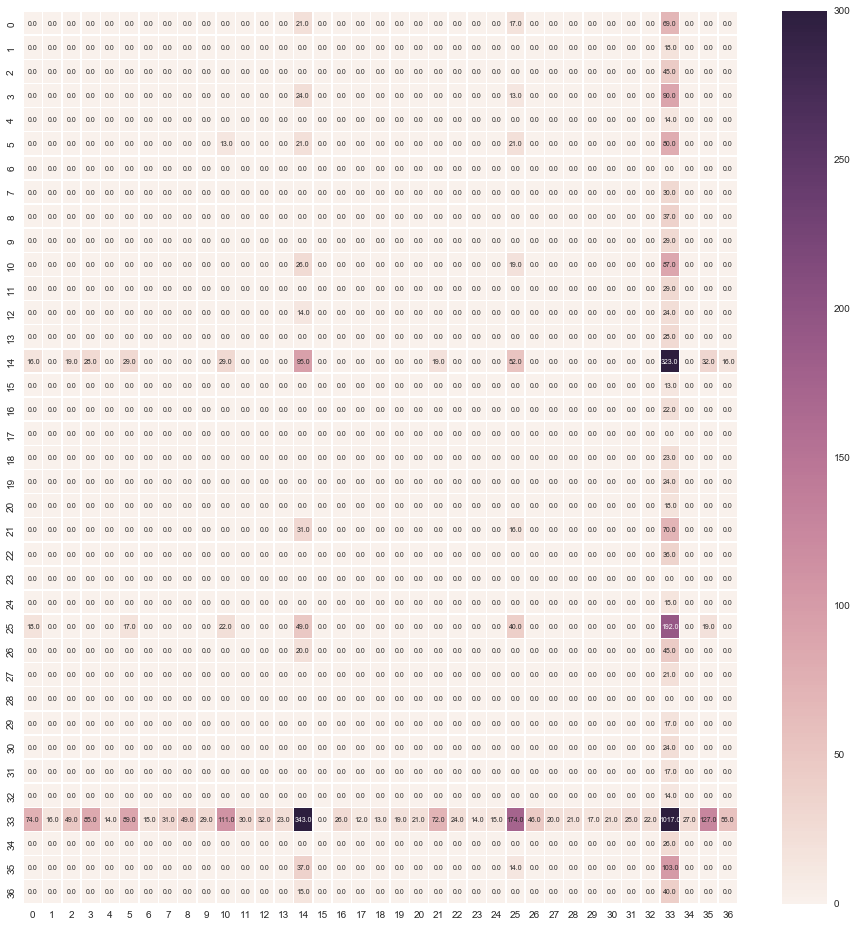

In [25]:
fig = plt.figure(figsize=(16,16))
#sns.heatmap(final_list,mask=mask, linewidths=.5, vmax=500,annot=True, fmt="", annot_kws={"size": 10})
sns.heatmap(final_list, linewidths=.5, vmax=300,annot=True, fmt="", annot_kws={"size": 7})
#fig.savefig("countries_heatmap.png")

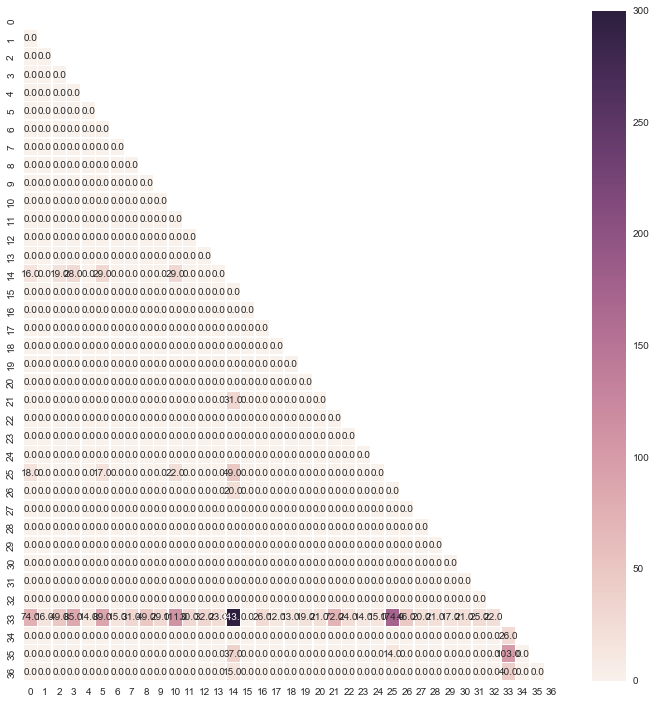

In [26]:
fig = plt.figure(figsize=(12,12))
sns.heatmap(final_list,mask=mask, linewidths=.5, vmax=300,annot=True, fmt="", annot_kws={"size": 10})
#sns.heatmap(final_list, linewidths=.5, annot=True, annot_kws={"size": 8})
fig.savefig("countries_heatmap_v2.png")

In [27]:
# fig = plt.figure()
# plt.imshow(final_list)
# plt.show()